In [1]:
import pandas as pd
csv_input = pd.read_csv(r'C:\Users\admin\Desktop\fypnew.csv') 

In [2]:
csv_input.dtypes

aParentId             int64
Reputation            int64
Views                 int64
UpVotes               int64
DownVotes             int64
aorder                int64
anewScore           float64
anewCommentCount    float64
QAnorm              float64
QAcnorm             float64
AAnorm              float64
AAcnorm             float64
Output                 bool
dtype: object

In [3]:
csv_input.head(3)

,aParentId,Reputation,Views,UpVotes,DownVotes,aorder,anewScore,anewCommentCount,QAnorm,QAcnorm,AAnorm,AAcnorm,Output
0,30170468,5734,655,1200,11,6,1.0,0.352941,0.222242,1.0,0.370021,1.0,False
1,30550240,16,8,1,0,4,0.0,0.000000,0.597433,1.0,0.000000,1.0,False
2,31922711,30898,2285,2844,154,1,1.0,0.000000,0.305050,1.0,0.758419,0.0,False


In [4]:
csv_input.shape

(8026, 13)

In [5]:
csv_input.isnull().any()

aParentId           False
Reputation          False
Views               False
UpVotes             False
DownVotes           False
aorder              False
anewScore           False
anewCommentCount    False
QAnorm              False
QAcnorm             False
AAnorm              False
AAcnorm             False
Output              False
dtype: bool

In [6]:
X=csv_input.iloc[:,1:-1]
Y=csv_input.iloc[:,-1]
print(X.head(3))
print(Y.head(3))

   Reputation  Views  UpVotes  DownVotes  aorder  anewScore  anewCommentCount  \
0        5734    655     1200         11       6        1.0          0.352941   
1          16      8        1          0       4        0.0          0.000000   
2       30898   2285     2844        154       1        1.0          0.000000   

     QAnorm  QAcnorm    AAnorm  AAcnorm  
0  0.222242      1.0  0.370021      1.0  
1  0.597433      1.0  0.000000      1.0  
2  0.305050      1.0  0.758419      0.0  
0    False
1    False
2    False
Name: Output, dtype: bool


In [7]:
for i in X.columns[:4]:
        X[i]= (X[i]-min(X[i]))/(max(X[i])-min(X[i]))

In [8]:
Y.value_counts()

True     4013
False    4013
Name: Output, dtype: int64

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline  
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

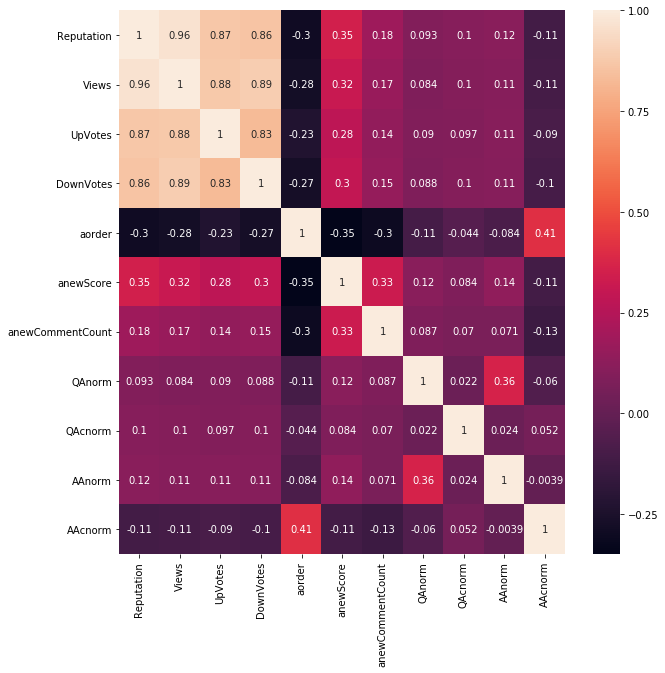

In [9]:
tc = X.corr(method="spearman") 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
corr = pd.DataFrame(tc)
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr, annot=True, ax=ax)

In [9]:
X=X.drop(['Views','UpVotes','DownVotes'],axis=1)
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#Y = ohe.fit_transform(Y).toarray()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True, random_state=0)
#print(y_train.value_counts())
#y_test.value_counts()

In [13]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

1.0


array([[3221,    0],
       [   0, 3199]], dtype=int64)

""""y_pred = clf.predict(Xtest)
print(metrics.accuracy_score(Ytest, y_pred))
print(confusion_matrix(Ytest, y_pred))""""
#clf.predict_proba(X) 

In [14]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
clf = RandomForestClassifier(n_estimators = 100,random_state=0)  
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

0.9998442367601246


array([[3221,    0],
       [   1, 3198]], dtype=int64)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) 
print(metrics.accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

0.8017133956386293


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[2584,  637],
       [ 636, 2563]], dtype=int64)

In [ ]:
from sklearn.externals import joblib
  
# Save the model as a pickle in a file
joblib.dump(logreg, 'b.txt')

In [ ]:

  
# Load the model from the file
model = joblib.load('a.txt') 

X_test.reset_index(drop=True, inplace=True)

# Use the loaded model to make predictions
res=model.predict(X_test)
prob=model.predict_proba(X_test)
print(res)
probab=[]

for i in range(0,len(res)):
    if res[i]==True:
        res[i]=1
    else:
        res[i]=0
    probab.append(max(prob[i]))
if(sum(res)==0):
    print( X_test.loc[prob.find(min(prob))])
elif(1 in res):
    max1=0
    c=0
    for i in range(0,len(res)):
        if res[i]==1 and probab[i]>max1:
            c=i
    print(c)
    print( X_test.loc[c])
    



In [18]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print(metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8100871731008717


array([[667, 125],
       [180, 634]], dtype=int64)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

0.8219626168224299


array([[2640,  581],
       [ 562, 2637]], dtype=int64)

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

0.7909657320872274


array([[2532,  689],
       [ 653, 2546]], dtype=int64)

In [34]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test) 
print(metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

0.7683686176836861


array([[572, 220],
       [152, 662]], dtype=int64)

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
m=[]
for i in range(13,14):
    for j in range(7,8):
        for k in range(4,5):
            for l in range(3,4):
                clf = MLPClassifier(alpha=1e-5, solver='lbfgs', hidden_layer_sizes=(i,j,k,l), random_state=1)
                clf.fit(X_train, y_train) 
                y_pred = clf.predict(X_test) 
                m.append(metrics.accuracy_score(y_test, y_pred))
                print(i,j,k,l,metrics.accuracy_score(y_test, y_pred))
                print(confusion_matrix(y_test, y_pred))


13 7 4 3 0.8244084682440846
[[659 133]
 [149 665]]


In [ ]:
print(m)